In [3]:
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns

In [23]:
from google.colab import files
uploaded = files.upload()

Saving Salary_Data.csv to Salary_Data.csv


In [24]:
data = pd.read_csv('Salary_Data.csv')

In [25]:
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# **EDA**

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [27]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [28]:
data.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [29]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [30]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

# **Correlation Analysis**

In [31]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


# **Visualization**

<ipython-input-32-fdc0ae0e508e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.YearsExperience)


<Axes: xlabel='YearsExperience', ylabel='Density'>

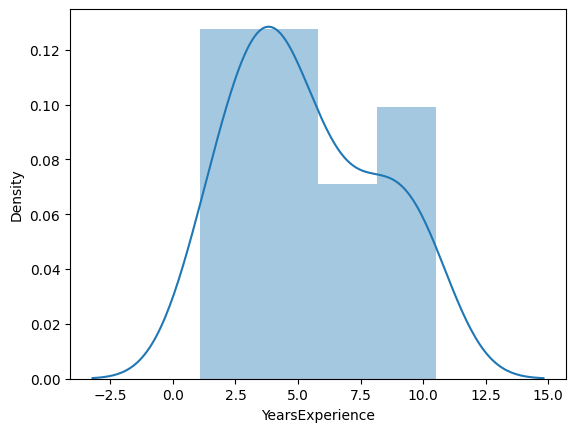

In [32]:
sns.distplot(data.YearsExperience)

<ipython-input-33-18bc49c01cc2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Salary)


<Axes: xlabel='Salary', ylabel='Density'>

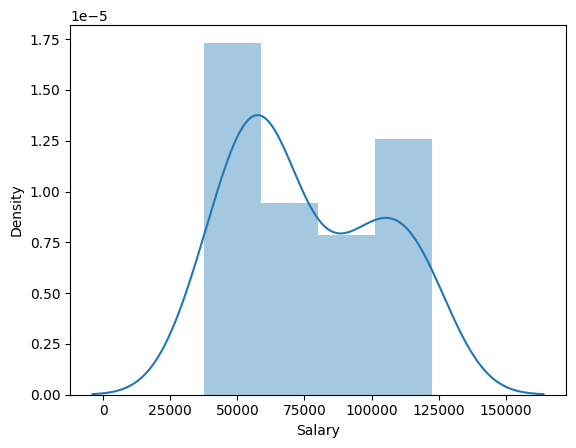

In [33]:
sns.distplot(data.Salary)

<Axes: xlabel='YearsExperience', ylabel='Salary'>

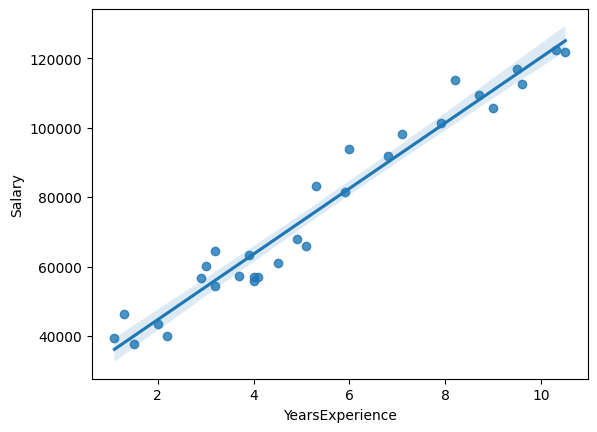

In [34]:
sns.regplot(x=data['YearsExperience'], y=data['Salary'])

# **Model Building**

In [35]:
model = smf.ols('Salary~YearsExperience', data = data).fit()

# **Model Testing**

In [36]:
model.params #finding coeffiecient parameters

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [38]:
model.tvalues, model.pvalues #finding tvalue and pvalue

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [39]:
# Finding Rsquared values that is accuracy
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

# **Model Predictions**

In [40]:
# Manual prediction for say 3 Years Experience
Salary = (25792.200199) + (9449.962321)*(3) #beta1 = 9449.962321, beta0 = 25792.200199, x = 3
Salary

54142.087162

In [41]:
#Predict for 3 and 5 Years Experience
newdata=pd.Series([3,5])
newdata

0    3
1    5
dtype: int64

In [42]:
data_pred=pd.DataFrame(newdata,columns=['YearsExperience'])
data_pred

,YearsExperience
0,3
1,5


In [43]:
model.predict(data_pred)

0    54142.087163
1    73042.011806
dtype: float64